# Importing Libaries


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud


In [2]:
pip install wordcloud

In [3]:
data_fake=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\Fake.csv",encoding="ISO-8859-1")
data_true=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\True.csv",encoding="ISO-8859-1")

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_fake.shape

(23481, 4)

In [6]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
data_true.shape

(21417, 4)

# Loading Dataset

In [8]:


data_fake.tail()


,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [9]:
data_fake["class"]=0
data_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [10]:
data_fake.tail()

,title,text,subject,date,class
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


# Creating Data set for model building

In [11]:


data_true["class"]=1
data_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [12]:
data_true.shape,data_fake.shape

((21417, 5), (23481, 5))

In [13]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [14]:
data_merge.shape

(44898, 5)

In [15]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
data=data_merge.drop(["title","subject","date"],axis=1)
data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [17]:
data.isna().sum()

text     0
class    0
dtype: int64

In [18]:
# Randomly picking Data in 1D

data=data.sample(frac=1)

In [19]:
data.head()

,text,class
22441,"21st Century Wire says For many viewers, this ...",0
18218,"Yesterday, Speaker Paul Ryan tweeted a video o...",0
6722,"During an April 24 Fox News segment, climate-c...",0
743,"Tuesday morning, attendees of a Senate subcomm...",0
11349,SEOUL (Reuters) - South Korea predicted on Tue...,1


In [20]:
data.to_csv('datas')

In [21]:
data.reset_index(inplace=True)
data.head()

,index,text,class
0,22441,"21st Century Wire says For many viewers, this ...",0
1,18218,"Yesterday, Speaker Paul Ryan tweeted a video o...",0
2,6722,"During an April 24 Fox News segment, climate-c...",0
3,743,"Tuesday morning, attendees of a Senate subcomm...",0
4,11349,SEOUL (Reuters) - South Korea predicted on Tue...,1


In [22]:
data.drop(['index'],axis=1,inplace=True)

In [23]:
# EDA
data.head()

,text,class
0,"21st Century Wire says For many viewers, this ...",0
1,"Yesterday, Speaker Paul Ryan tweeted a video o...",0
2,"During an April 24 Fox News segment, climate-c...",0
3,"Tuesday morning, attendees of a Senate subcomm...",0
4,SEOUL (Reuters) - South Korea predicted on Tue...,1


In [24]:
data.columns

Index(['text', 'class'], dtype='object')

In [25]:
data.shape

(44898, 2)

In [26]:
data.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [28]:
data.isna().sum()

text     0
class    0
dtype: int64

In [29]:
## Preprocessing the Text Data
#creating function to process text
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text


<>:5: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_10048\2280267005.py:5: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_10048\2280267005.py:7: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+','',text)
C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_10048\2280267005.py:11: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [30]:
data["text"]=data["text"].apply(wordopt)

# Data Vistualization

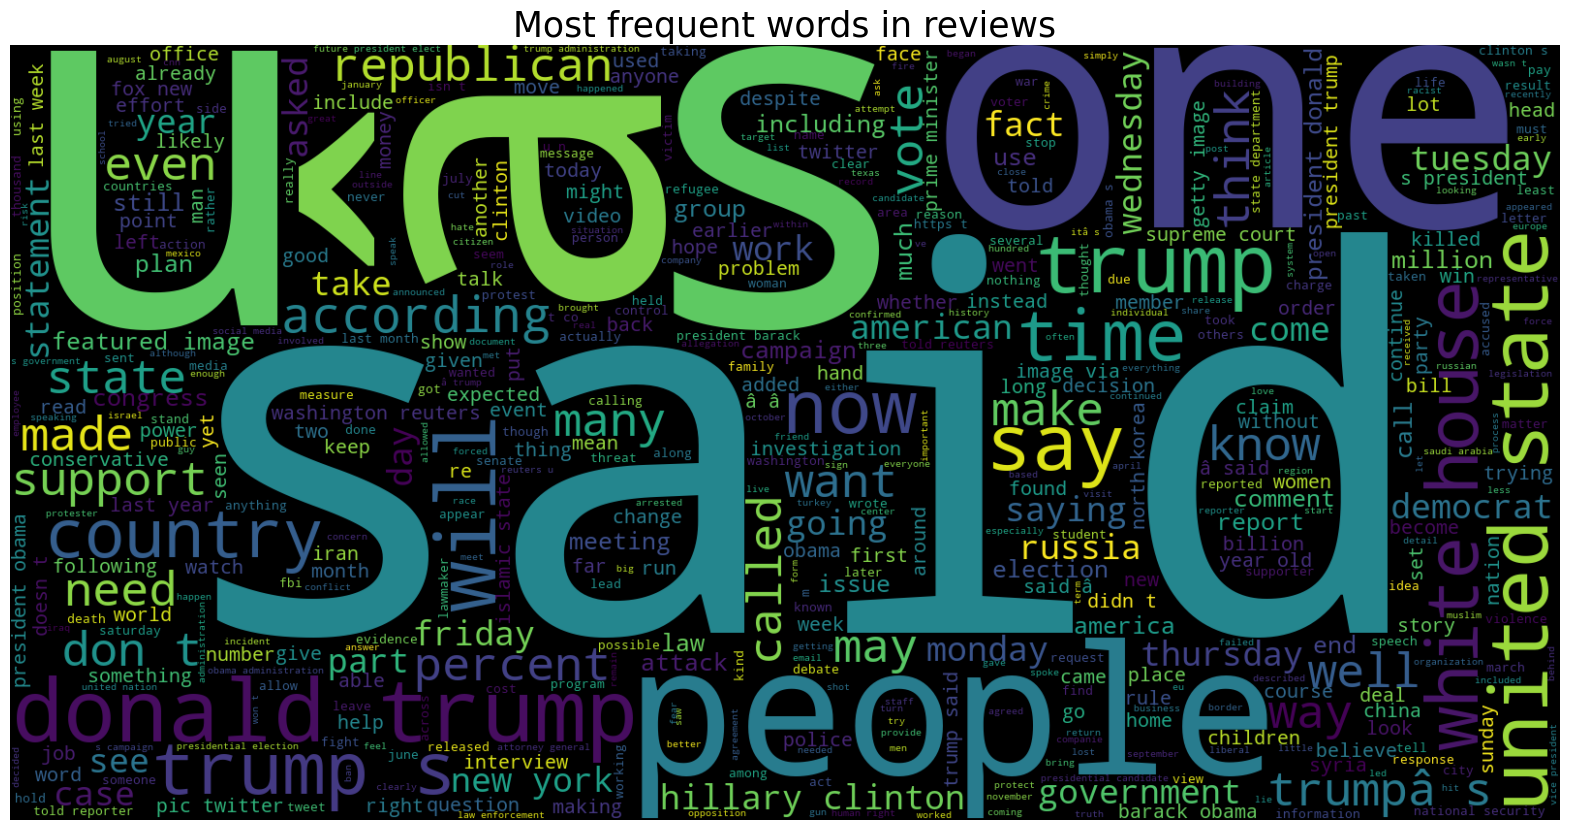

In [32]:
text=' '.join([word for word in data['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in reviews', fontsize=25)
plt.show()

# Data Spliting


In [34]:
x=data["text"]
y=data["class"]

In [35]:
x

0         century wire says for many viewers  this came...
1        yesterday  speaker paul ryan tweeted a video o...
2        during an april  fox news segment  climate cha...
3        tuesday morning  attendees of a senate subcomm...
4        seoul  reuters    south korea predicted on tue...
                               ...                        
44893    washington  reuters    u s  house speaker paul...
44894    conservatives have embraced the idea that ever...
44895    this is truly epic  mark levin goes after the ...
44896     reuters    donald trumpâ  s presidential camp...
44897    lt  col  tony shaffer opened a can of worms to...
Name: text, Length: 44898, dtype: object

In [36]:
y

0        0
1        0
2        0
3        0
4        1
        ..
44893    1
44894    0
44895    0
44896    1
44897    0
Name: class, Length: 44898, dtype: int64

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [38]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(33673,) (11225,) (33673,) (11225,)


# NLP

In [40]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [41]:
xv_train

<33673x101139 sparse matrix of type '<class 'numpy.float64'>'
	with 6923090 stored elements in Compressed Sparse Row format>

In [42]:
xv_train.shape

(33673, 101139)

# Model Building

## Logistic Regression

In [45]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [46]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [47]:
LR_acc=LR.score(xv_test,y_test)
LR_acc

0.98913140311804

In [48]:
print(classification_report(y_test,pred_lr1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5936
           1       0.99      0.99      0.99      5289

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



## Decision Tree Classifier

In [50]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [51]:
pred_dt1=DT.predict(xv_test)
pred_dt1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [52]:
pred_dt2=DT.predict(xv_train)
pred_dt2

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [53]:
DT_acc=accuracy_score(y_test,pred_dt1)
DT_acc

0.9971492204899778

In [54]:
precision_score(y_test,pred_dt1)

0.9979162720212161

## Gradient Boosting Classifier

In [56]:
GB=GradientBoostingClassifier()
GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [57]:
pred_gb=GB.predict(xv_test)
#pred_gb=GB.predict(xv_train)
pred_gb

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [58]:
y_test

22216    0
27917    0
25007    1
1377     1
32476    1
        ..
15578    1
29394    0
3120     0
25388    1
14337    0
Name: class, Length: 11225, dtype: int64

In [59]:
GB_acc=accuracy_score(y_test,pred_gb)
GB_acc

0.995011135857461

In [60]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5936
           1       0.99      1.00      0.99      5289

    accuracy                           1.00     11225
   macro avg       0.99      1.00      0.99     11225
weighted avg       1.00      1.00      1.00     11225



## Random Forest Classifier

In [62]:
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [63]:
pred_rf=RF.predict(xv_test)

In [64]:
RF_acc=RF.score(xv_test,y_test)
RF_acc

0.9928730512249443

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_rf))

[[5895   41]
 [  39 5250]]


## Performance Analysis on each model

In [129]:
pt=[]
t=[]
for i in[LR,GB,RF,DT]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
    t.append(round(accuracy_score(y_train,i.predict(xv_train))*100,2))
print(pt)
print(t)

[98.91, 99.44, 99.29, 99.68]
[99.34, 99.68, 100.0, 100.0]
